# PART A

#### DOMAIN: 

Electronics and Telecommunication

#### CONTEXT: 

A communications equipment manufacturing company has a product which is responsible for emitting informative signals. 
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 
#### DATA DESCRIPTION: 

The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.

2. Signal_Quality: Final signal strength or quality.

#### PROJECT OBJECTIVE: 

To build a classifier which can use the given parameters to determine the signal strength or quality.

## 1. Data import and Understanding:

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import random
seed = 7
np.random.seed(seed)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

### A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [3]:
df1 = pd.read_csv('NN Project Data - Signal.csv')
df1.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset Signals.csv is read and its first 5 rows are printed.

In [4]:
print('The shape of the given dataset',df1.shape) #This displays the dataset thats given

The shape of the given dataset (1599, 12)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 11 columns (Parameter 1-11) which are of float datatype but one column (Signal_Strength) that is of int type.

In [6]:
df1.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean, minimum and max values are almost close and dont differ much.

### B. Check for missing values and print percentage for each attribute.

In [7]:
df1.isnull().sum() #Null values are dispalyed

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [8]:
percent_missing = df1.isnull().sum() * 100/len(df1)
missing_value = pd.DataFrame({'Column Name' : df1.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
Parameter 1,Parameter 1,0.0
Parameter 2,Parameter 2,0.0
Parameter 3,Parameter 3,0.0
Parameter 4,Parameter 4,0.0
Parameter 5,Parameter 5,0.0
Parameter 6,Parameter 6,0.0
Parameter 7,Parameter 7,0.0
Parameter 8,Parameter 8,0.0
Parameter 9,Parameter 9,0.0
Parameter 10,Parameter 10,0.0


As per above code, The percent of missing values in each of the columns is 0.

### C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [9]:
original_rows = df1.shape[0]
original_columns = df1.shape[1]

In [10]:
df2 = df1.copy()

In [11]:
# remove duplicates, if any

df2 = df2.drop_duplicates()
print(f'Step5: df3 Shape(after removing duplicates): Rows: {df2.shape[0]} and Columns: {df2.shape[1]}\n')

print(f'Overall {round(100 - df2.shape[0]*100/original_rows,2)}% samples are dropped\n')
df2.head()

Step5: df3 Shape(after removing duplicates): Rows: 1359 and Columns: 12

Overall 15.01% samples are dropped



,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


The rows are reduced from 1599 to 1359 with 12 columns.

In [12]:
df2.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


There are 11 columns (Parameter 1-11) which are of float datatype but one column (Signal_Strength) that is of int type for all the 1359 entries.

### D. Visualise distribution of the target variable.

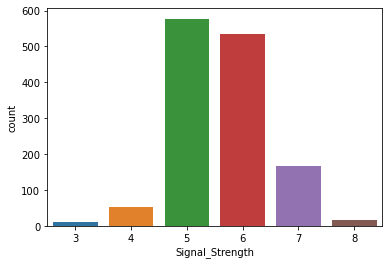

In [14]:
sns.countplot(df2['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

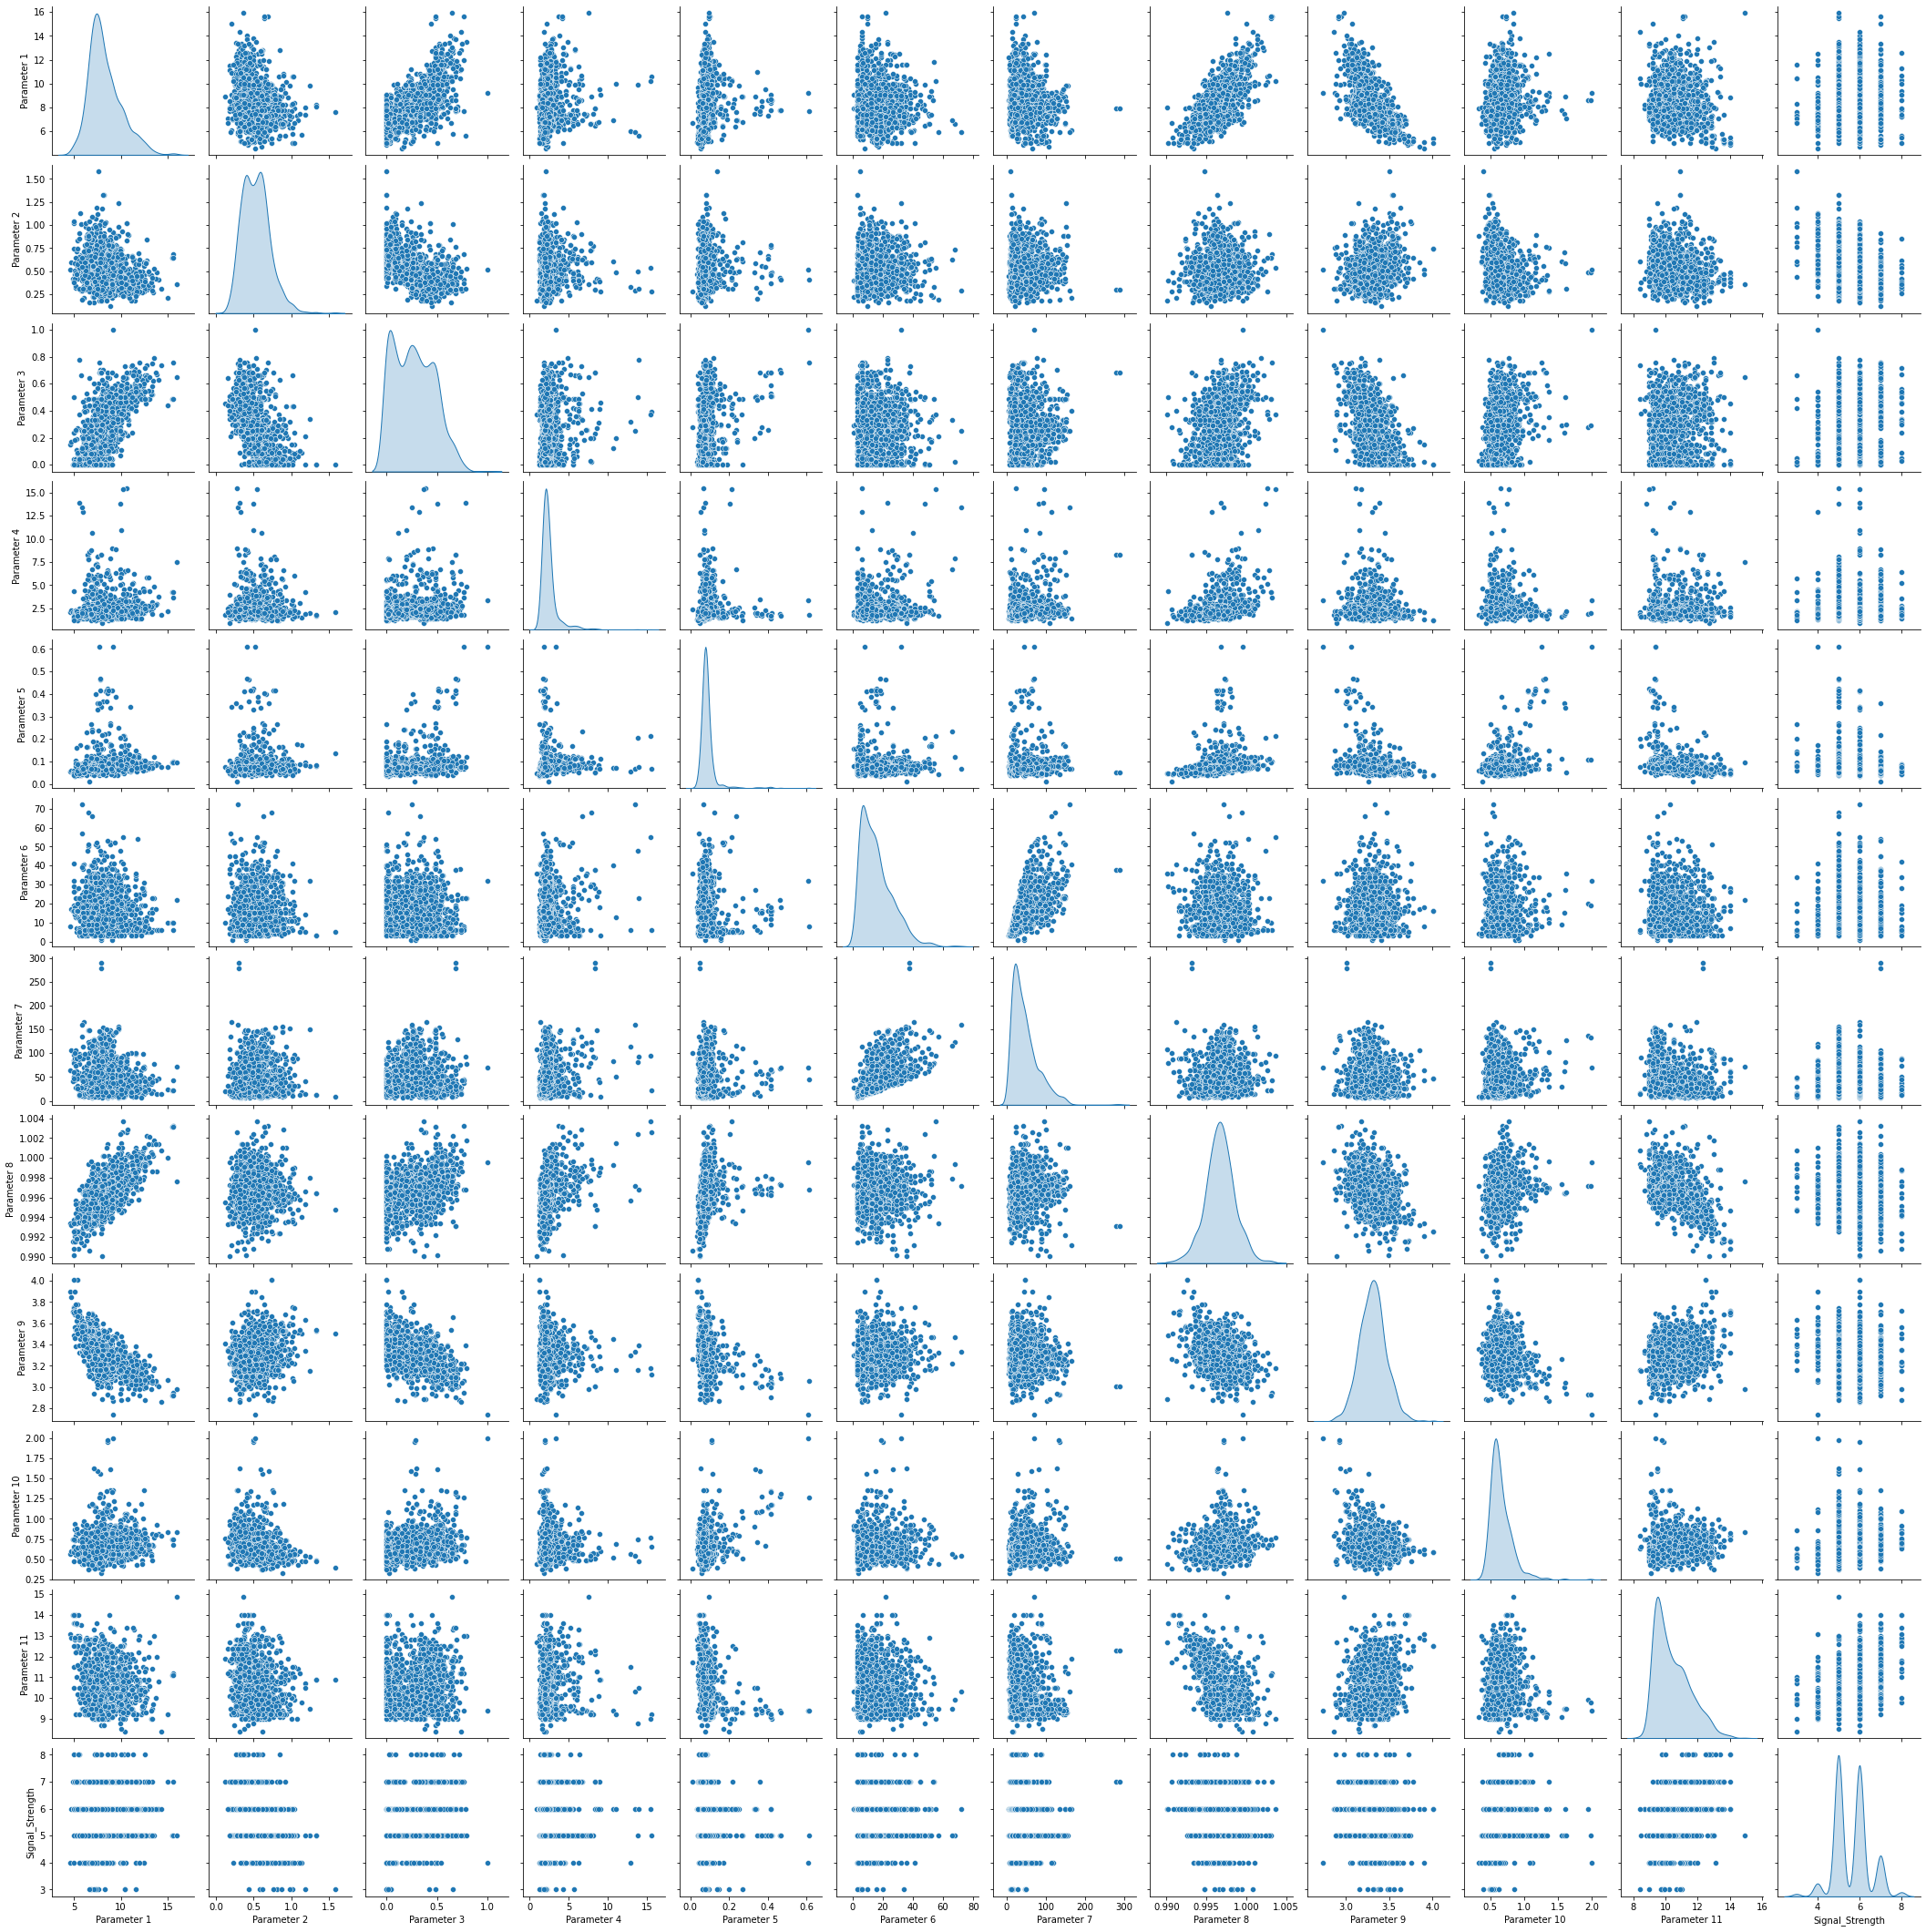

In [15]:
sns.pairplot(df2,diag_kind='kde')
plt.show()

In [16]:
corr = df2.corr()

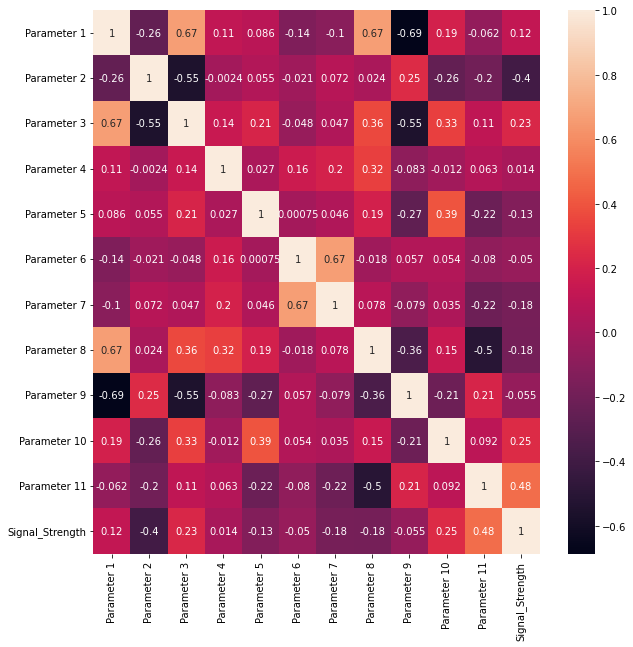

In [17]:
#Visualize the data with Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True);

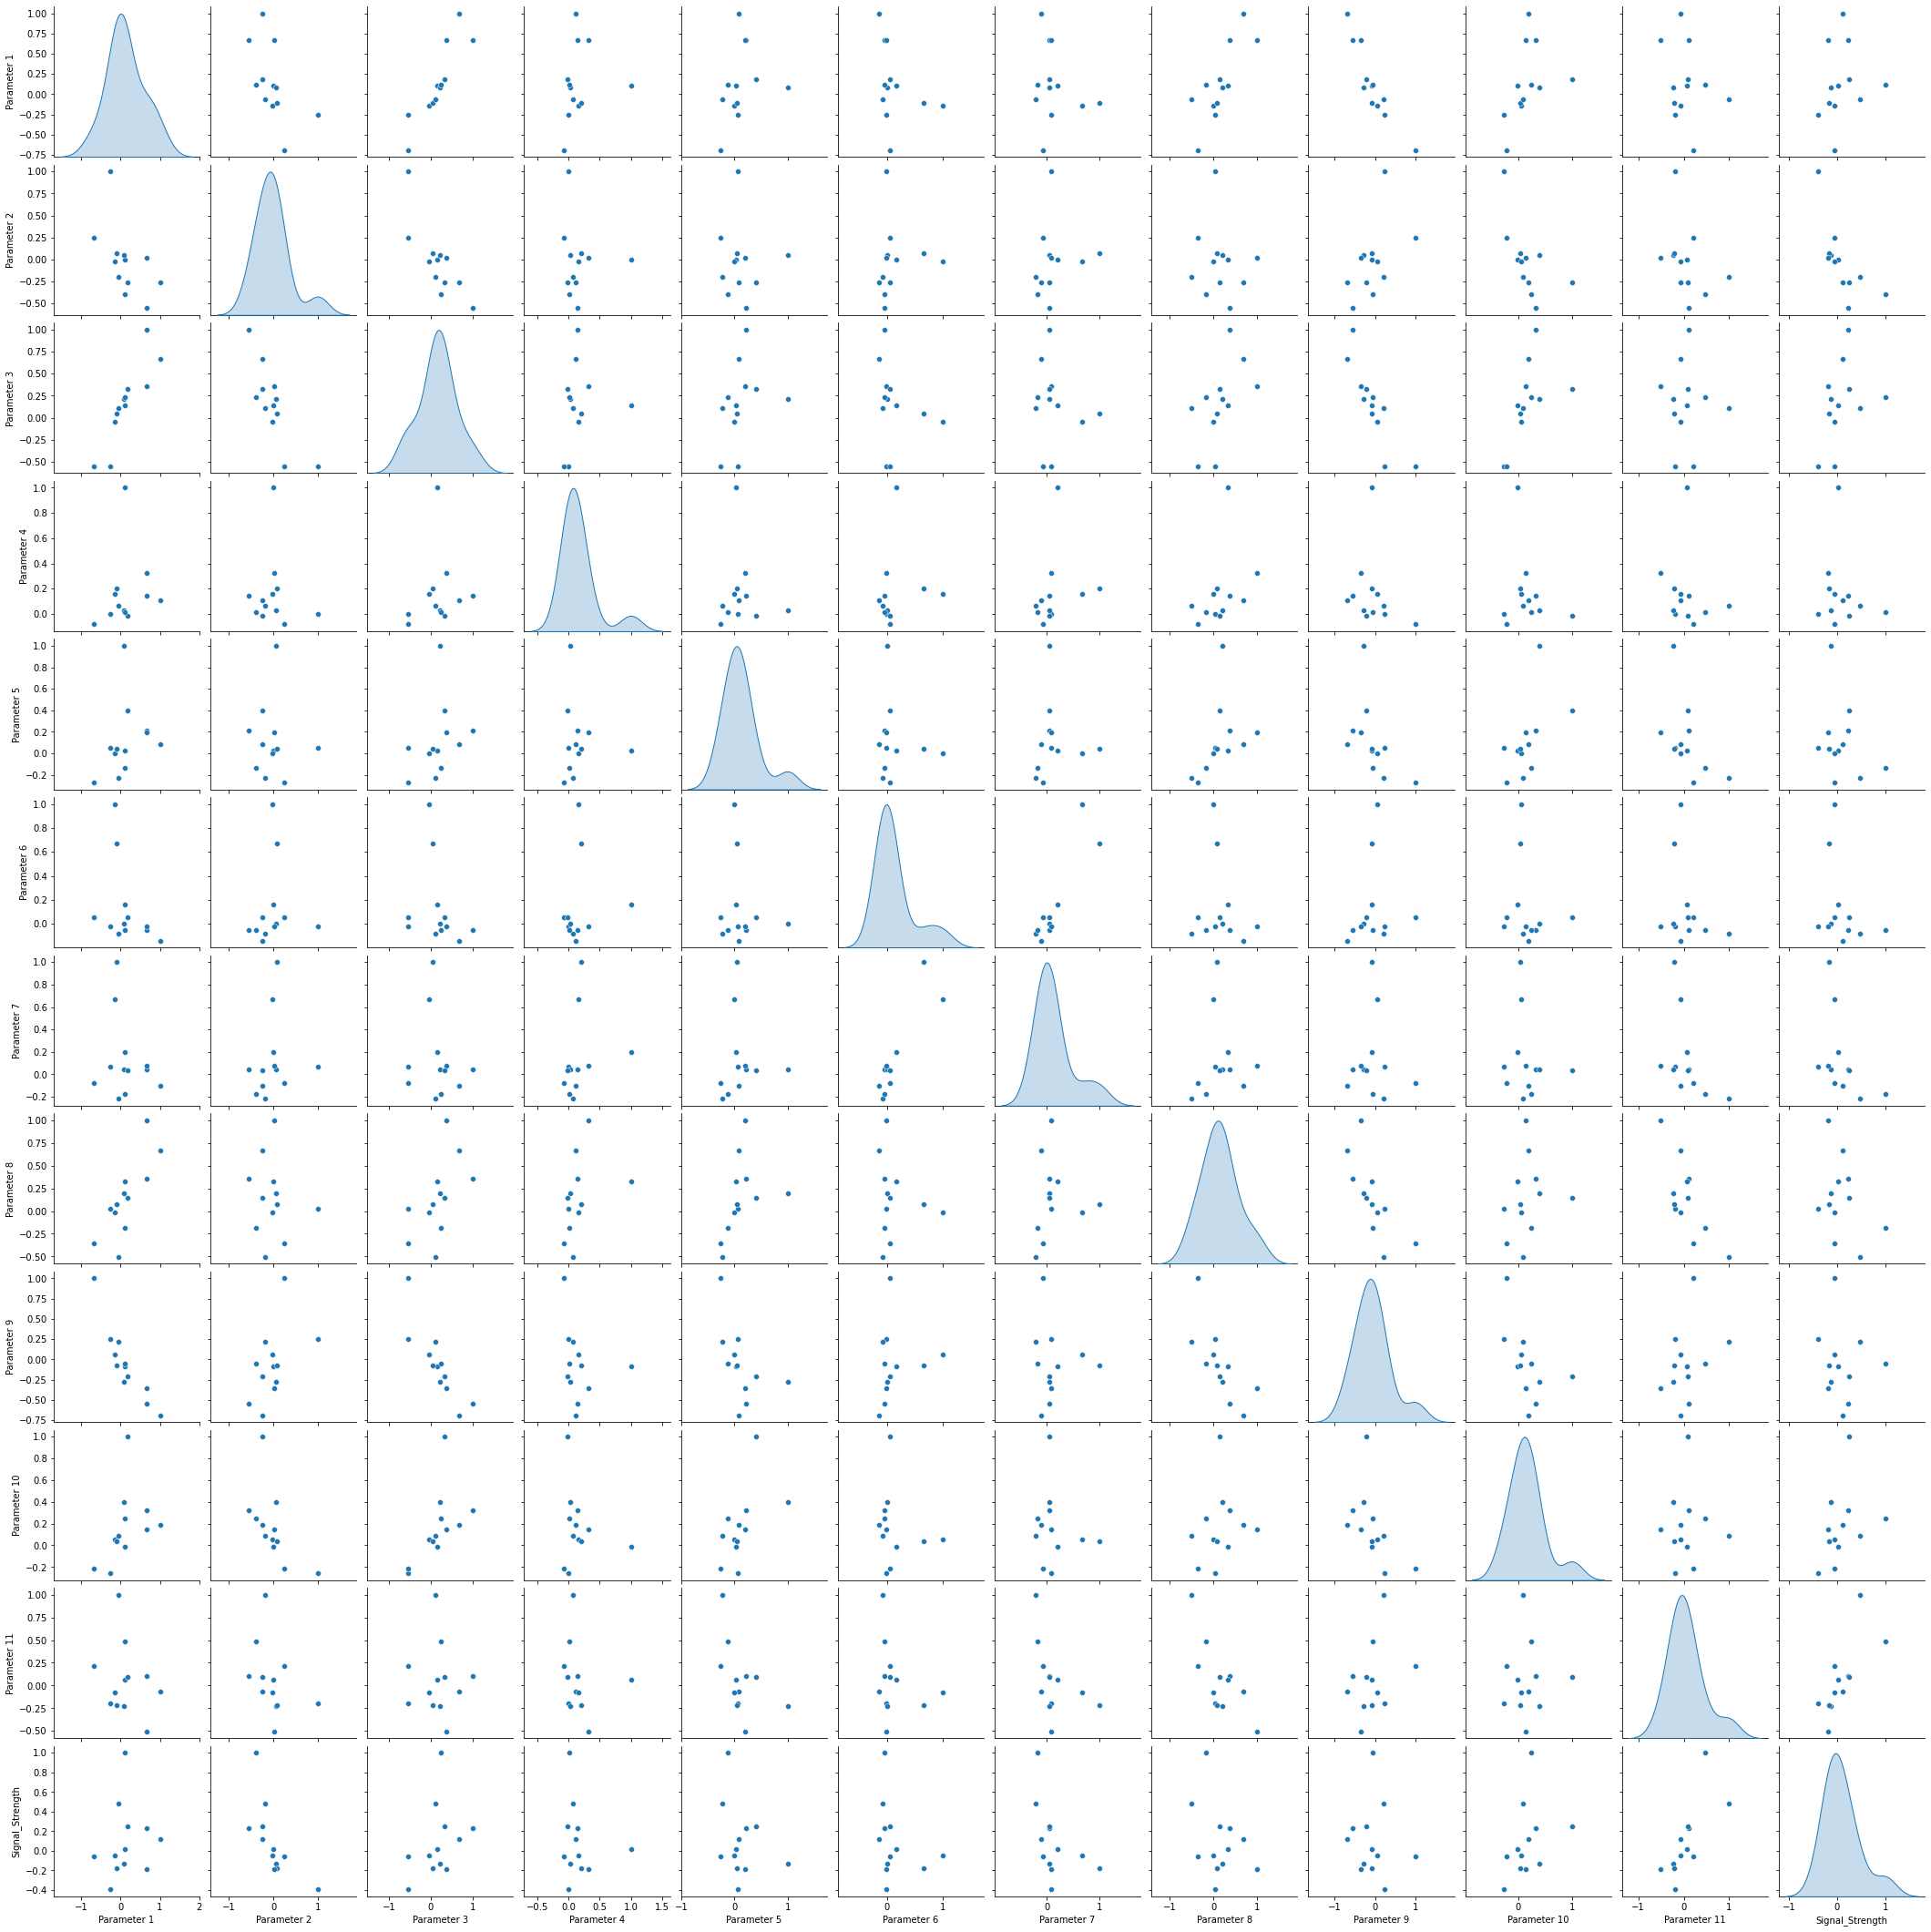

In [18]:
sns.pairplot(corr,diag_kind='kde')
plt.show()

### E. Share insights from the initial data analysis (at least 2).

1.No null values are present in the dataset.

2.There are 240 duplicates which can be dropped from 1599 to 1359.

3.Signal strength value ranges 3 to 8 and The signal strength 5,6 has value counts above 500.

4.All the independent features(Parameters) are "float64" datatype & the dependent feature(Signal_Strength) is "int64" datatype.

5.Parameter 6 and Parameter 7 are highly correlated 

6.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 

7.Parameter 4 is has very low correlation with other Parameters.

## 2. Data preprocessing:

### A. Split the data into X & Y

In [19]:
# Split the data as X & Y

X = df2.drop("Signal_Strength", axis=1)

y = df2['Signal_Strength'] #Target Variable

### B. Split the data into train & test with 70:30 proportion

In [20]:
from sklearn.model_selection import train_test_split

# splitting to create test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=seed) 

### C. Print shape of all the 4 variables and verify if train and test data is in sync

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


### D. Normalise the train and test data with appropriate method

In [22]:
X2_train = preprocessing.normalize(X_train)
X2_test = preprocessing.normalize(X_test)

### E. Transform Labels into format acceptable by Neural Network

In [23]:
# One-hot encode the labels

Y2_train = to_categorical(y_train, dtype='int64')
Y2_test = to_categorical(y_test, dtype='int64')

#### The labels are transformed by to_categorically function.

In [24]:
#Split the dataframe as train & validation data (70:30)

X_train1, X_val,y_train1,y_val = train_test_split(X2_train,Y2_train,test_size = 0.3, random_state=42)

In [25]:
print(X_train1.shape)
print(X_val.shape)
print(y_train1.shape)
print(y_val.shape)

(665, 11)
(286, 11)
(665, 9)
(286, 9)


## 3. Model Training & Evaluation using Neural Network

### A. Design a Neural Network to train a classifier.

In [26]:
# Clear the backend session & set random seed
backend.clear_session()
import random
random.seed(42)
tf.random.set_seed(42)

In [27]:
 # Create a model
model_class = Sequential()

# Multiple Dense units with Relu activation
model_class.add(Dense(9, activation='relu'))
model_class.add(BatchNormalization())
model_class.add(Dense(32, activation='relu'))
model_class.add(Dropout(0.5))
model_class.add(Dense(9,  activation='softmax'))

In [28]:
opt = optimizers.Adam(learning_rate=0.0001)

### B. Train the classifier using previously designed Architecture.

In [29]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

# Fit the model
NN_mod_1 = model_class.fit(x=X_train1, y=y_train1, batch_size=200, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
4/4 [==============================] - 2s 154ms/step - loss: 2.2193 - accuracy: 0.2090 - val_loss: 2.1657 - val_accuracy: 0.3986
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 2.1968 - accuracy: 0.2195 - val_loss: 2.1639 - val_accuracy: 0.3986
Epoch 3/100
4/4 [==============================] - 0s 28ms/step - loss: 2.2078 - accuracy: 0.2150 - val_loss: 2.1622 - val_accuracy: 0.3986
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 2.1896 - accuracy: 0.2045 - val_loss: 2.1605 - val_accuracy: 0.3986
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 2.2154 - accuracy: 0.2226 - val_loss: 2.1589 - val_accuracy: 0.3986
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 2.2005 - accuracy: 0.2105 - val_loss: 2.1574 - val_accuracy: 0.3986
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 2.1856 - accuracy: 0.2120 - val_loss: 2.1559 - val_accuracy: 0.3986
Epoch 8/100
4/4 [==

In [30]:
# score of test data
score_t = model_class.evaluate(X2_test, Y2_test)
print("Loss : %.2f" %(score_t[0]))
print("Accuracy : %.2f" %(score_t[1]))

13/13 [==============================] - 0s 2ms/step - loss: 1.9237 - accuracy: 0.4706
Loss : 1.92
Accuracy : 0.47


### C. Plot 2 separate visuals.

i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

Text(0.5, 1.0, 'Training and validation loss')

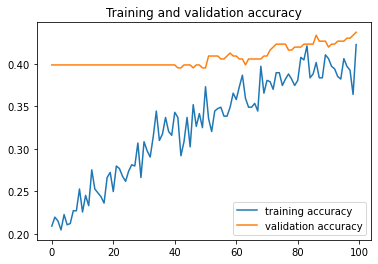

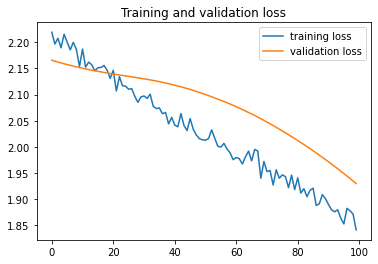

In [31]:
# Plot the training & Validation Loss & accuracy
Acc = NN_mod_1.history['accuracy']
Val_acc  = NN_mod_1.history['val_accuracy']
Loss     = NN_mod_1.history['loss']
Val_loss = NN_mod_1.history['val_loss']

epochs   = range(len(Acc)) # Get number of epochs

plt.plot  ( epochs, Acc, label = 'training accuracy' )
plt.plot  ( epochs, Val_acc, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

#### The previous model has training accuracy of 40% and validation accuracy of 47%.

In order to improve the accuracy, we have to modify the parameters.

In [32]:
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [33]:
signal_model1 = Sequential()

# Multiple Dense units with Relu activation
signal_model1.add(Dense(32, activation='relu'))
signal_model1.add(Dense(64, activation='relu'))
signal_model1.add(Dense(128, activation='relu'))
signal_model1.add(Dense(512, activation='relu'))
signal_model1.add(Dense(256, activation='relu'))
signal_model1.add(Dense(128, activation='relu'))
signal_model1.add(Dense(64, activation='relu'))
signal_model1.add(Dense(9, activation='softmax'))

In [34]:
opt1 = optimizers.Adam(learning_rate=0.01)

In [35]:
# Compile the model
signal_model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt1)

# Fit the model
NN_mod_2 = signal_model1.fit(x=X_train1, y=y_train1, batch_size=70, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
10/10 [==============================] - 2s 59ms/step - loss: 1.5724 - accuracy: 0.3850 - val_loss: 1.3827 - val_accuracy: 0.3986
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.2557 - accuracy: 0.4241 - val_loss: 1.2115 - val_accuracy: 0.4301
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 1.2401 - accuracy: 0.4045 - val_loss: 1.2359 - val_accuracy: 0.3986
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 1.2269 - accuracy: 0.3880 - val_loss: 1.2208 - val_accuracy: 0.3986
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 1.2091 - accuracy: 0.4075 - val_loss: 1.2024 - val_accuracy: 0.5245
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 1.2041 - accuracy: 0.4707 - val_loss: 1.1951 - val_accuracy: 0.4720
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 1.1836 - accuracy: 0.4677 - val_loss: 1.1861 - val_accuracy: 0.5175
Epoch 

In [36]:
score1 = signal_model1.evaluate(X2_test, Y2_test)
print("Loss : %.2f" %(score1[0]))
print("Accuracy : %.2f" %(score1[1]))

13/13 [==============================] - 0s 3ms/step - loss: 1.0284 - accuracy: 0.5735
Loss : 1.03
Accuracy : 0.57


In [37]:
print(X_train1.shape, X2_test.shape, y_train1.shape, Y2_test.shape)

(665, 11) (408, 11) (665, 9) (408, 9)


In [38]:
signal_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

### E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

Text(0.5, 1.0, 'Training and validation loss')

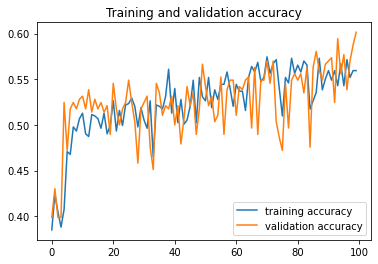

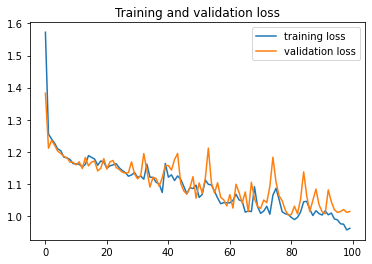

In [39]:
# Plot the training & Validation Loss & accuracy
Accuracy = NN_mod_2.history['accuracy']
Val_Accuracy  = NN_mod_2.history['val_accuracy']
Loss     = NN_mod_2.history['loss']
Val_Loss = NN_mod_2.history['val_loss']

epochs   = range(len(Accuracy)) # Get number of epochs

plt.plot  ( epochs, Accuracy, label = 'training accuracy' )
plt.plot  ( epochs, Val_Accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_Loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

The accuracy of training and validation has been improved from 40%, 47% to 54% and 59% respectively.

This is done by tuning the parameters like reducing the batch size to 10 and increasing the epochs to 500.

# PART B

#### DOMAIN: 

Autonomous Vehicles

#### CONTEXT: 

A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map 
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. 

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. 

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

#### DATA DESCRIPTION: 

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the 
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). 

SVHN is obtained from house numbers in Google Street View images

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

#### Acknowledgement:

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site

### • PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

## 1. Data Import and Exploration:

In [40]:
#Importing important libraries

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

### A. Read the .h5 file and assign to a variable.

In [41]:
df1 = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')

The .h5 file is downloaded and read(r) and then stored into a variable df1.

### B. Print all the keys from the .h5 file. 

In [42]:
df1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

The keys of df1 are:

X_test, 

X_train,

X_val, 

y_test,

y_train, 

y_val.

### C. Split the data into X_train, X_test, Y_train, Y_test

In [43]:
X_train=df1['X_train']
X_test=df1['X_test']
X_val=df1['X_val']
y_train=df1['y_train']
y_test=df1['y_test']
y_val=df1['y_val']

## 2. Data Visualisation and preprocessing :

### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [44]:
print("The Shape of X_test is",X_test.shape)
print("The Shape of X_train is",X_train.shape)
print("The Shape of X_val is",X_val.shape)
print("The Shape of y_test is",y_test.shape)
print("The Shape of y_train is",y_train.shape)
print("The Shape of y_val is",y_val.shape)

The Shape of X_test is (18000, 32, 32)
The Shape of X_train is (42000, 32, 32)
The Shape of X_val is (60000, 32, 32)
The Shape of y_test is (18000,)
The Shape of y_train is (42000,)
The Shape of y_val is (60000,)


### B. Visualise first 10 images in train data and print its corresponding labels. 

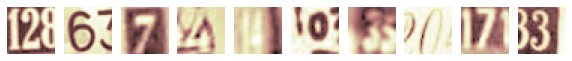

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='pink')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### C. Reshape all the images with appropriate shape update the data in same variable.

In [46]:
X_train = np.asarray(X_train).reshape(42000,1024)
print("X_train shape is",X_train.shape)

X_test = np.asarray(X_test).reshape(18000,1024)
print("X_test shape is",X_test.shape)

X_val = np.asarray(X_val).reshape(60000,1024)
print("X_val shape is",X_val.shape)

X_train shape is (42000, 1024)
X_test shape is (18000, 1024)
X_val shape is (60000, 1024)


### D. Normalise the images i.e. Normalise the pixel values.

In [47]:
# Min value of train data
Min = X_train.min()

# Max value of train data
Max = X_train.max()

print("Minimum value of train data is", Min)
print("Maximum value of train data is", Max)

Minimum value of train data is 0.0
Maximum value of train data is 254.9745


In [48]:
# Normalize the data # Convert the values between 0 to 1.

X_train = X_train / Max
X_val = X_val / Max
X_test = X_test / Max

In [49]:
X_train.max()

1.0

### E. Transform Labels into format acceptable by Neural Network

In [50]:
print(" Sample value before encoding:", y_train[1])

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print("\n Sample value after encoding:",y_train[1])

 Sample value before encoding: 6

 Sample value after encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


The sample values are transformed from 6 to 0's ans 1's.

In [51]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


### F. Print total Number of classes in the Dataset.

In [52]:
print('The total number of classess in the dataset:',y_train.shape[1])

The total number of classess in the dataset: 10


## 3. Model Training & Evaluation using Neural Network

### A. Design a Neural Network to train a classifier. 

### B. Train the classifier using previously designed Architecture

In [53]:
# Clear the backend session & set random seed
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [54]:
#Create a Neural Network model
NN_model1 = Sequential()

# Add hidden & Output layers
NN_model1.add(Dense(64, input_shape=(1024,), activation='relu'))
NN_model1.add(Dense(128,activation='relu'))
NN_model1.add(Dense(128,activation='relu'))
NN_model1.add(BatchNormalization())
NN_model1.add(Dense(256,activation='relu'))
NN_model1.add(Dropout(0.5))
NN_model1.add(Dense(512,activation='relu'))
NN_model1.add(BatchNormalization())
NN_model1.add(Dropout(0.5))
NN_model1.add(Dense(256,activation='relu'))
NN_model1.add(Dense(10, activation='softmax'))

# adam optmizer with custom learning rate
opt= optimizers.Adam(0.001)

#Compile the model
NN_model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Fit the model
History = NN_model1.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=500)

Epoch 1/100
84/84 [==============================] - 6s 42ms/step - loss: 2.4207 - accuracy: 0.1713 - val_loss: 2.1927 - val_accuracy: 0.2621
Epoch 2/100
84/84 [==============================] - 3s 30ms/step - loss: 1.6485 - accuracy: 0.4321 - val_loss: 1.6773 - val_accuracy: 0.5580
Epoch 3/100
84/84 [==============================] - 3s 35ms/step - loss: 1.3115 - accuracy: 0.5742 - val_loss: 1.5132 - val_accuracy: 0.4835
Epoch 4/100
84/84 [==============================] - 3s 34ms/step - loss: 1.1775 - accuracy: 0.6265 - val_loss: 1.1843 - val_accuracy: 0.6085
Epoch 5/100
84/84 [==============================] - 3s 38ms/step - loss: 1.0867 - accuracy: 0.6600 - val_loss: 1.1072 - val_accuracy: 0.6295
Epoch 6/100
84/84 [==============================] - 3s 38ms/step - loss: 1.0336 - accuracy: 0.6755 - val_loss: 1.1817 - val_accuracy: 0.6102
Epoch 7/100
84/84 [==============================] - 3s 32ms/step - loss: 1.0058 - accuracy: 0.6840 - val_loss: 0.9097 - val_accuracy: 0.7093
Epoch 

### C. Evaluate performance of the model with appropriate metrics. 

In [55]:
score = NN_model1.evaluate(X_test, y_test)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.6549 - accuracy: 0.8103
Loss : 0.65
Accuracy : 0.81


This model is of 80% accuracy and has loss of 69%

In [56]:
NN_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

There are a total of 391,498 parameters where 390,218 are trainable and the rest 1280 are non-trainable.

### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

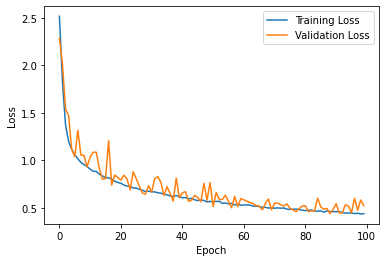

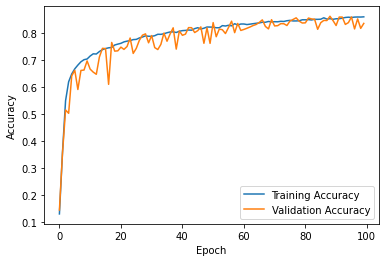

In [55]:
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy vs. number of epochs
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. Improve the model accuracy by reducing the learning rate. 

2. Dropout & Normalization functions will help to prevent overfitting the model.

3. The accuracy of the model is improvised by increasing the epochs.

4. With the above plots, We can see the accuracy & loss of the model(NN). 

The accuracy starts from 30.05% and with the 100 no. of epoch maximum got 81% accuracy. 

We can see that there is a lot of noise in the model & more fluctuations in the validation set, where there is a steady rise in the train set accuracy.

# THE END